In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-retail-ii-uci/online_retail_II.csv


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/kaggle/input/online-retail-ii-uci/online_retail_II.csv')

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.shape

(1067371, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [7]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [8]:
df.describe(include='O')

,Invoice,StockCode,Description,InvoiceDate,Country
count,1067371,1067371,1062989,1067371,1067371
unique,53628,5305,5698,47635,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-06 16:57:00,United Kingdom
freq,1350,5829,5918,1350,981330


In [9]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [10]:
df[df['Customer ID'].isna()].head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [11]:
df[df['Quantity']<0].head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


In [12]:
df['Invoice'] = df['Invoice'].astype('str')
df[df['Invoice'].str.match('^\\d{6}$')==False].head(30)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


In [13]:
df['Invoice'].str.replace('[0-9]' , "" , regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [14]:
df.shape

(1067371, 8)

In [15]:
df['StockCode'] = df['StockCode'].astype('str')
df[df['StockCode'].str.match('^\\d{5}$')==False].head(7)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
29,489436,84596L,BISCUITS SMALL BOWL LIGHT BLUE,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
42,489437,84507B,STRIPES DESIGN MONKEY DOLL,6,2009-12-01 09:08:00,2.55,15362.0,United Kingdom


In [16]:
df['StockCode'].str.replace('[0-9]' , "" , regex=True).unique()

array(['', 'P', 'W', 'C', 'B', 'F', 'L', 'S', 'A', 'N', 'POST', 'E', 'J',
       'D', 'G', 'LP', 'BL', 'K', 'H', 'GR', 'M', 'DCGS', 'DOT', 'U', 'b',
       'w', 'c', 'a', 'f', 'bl', 's', 'p', 'R', 'V', 'T', 'I',
       'BANK CHARGES', 'O', 'Z', 'TEST', 'gift__', 'DCGSN', 'm', 'PADS',
       'Y', 'HC', 'e', 'd', 'ADJUST', 'DCGSSGIRL', 'GIFT', 'DCGSLBOY',
       'k', 'g', 'DCGSSBOY', 'DCGSLGIRL', 'j', 'l', 'n', 'J ', 'SP',
       'AMAZONFEE', 'DCGSP', 'CRUK'], dtype=object)

In [17]:
df[df['StockCode'].str.match('^\\d{5}$')==False].shape

(134986, 8)

**Data Cleaning**

In [18]:
cleaned_df = df.copy()
cleaned_df.shape

(1067371, 8)

In [19]:
drop_invoice = cleaned_df[cleaned_df['Invoice'].str.startswith('A')]

In [20]:
cleaned_df.drop(drop_invoice.index, inplace=True)

In [21]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')
drop_StockCode = cleaned_df[cleaned_df['StockCode'].str.match('^\\d{5}$') == False]

In [22]:
drop_StockCode.head(8)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
29,489436,84596L,BISCUITS SMALL BOWL LIGHT BLUE,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
42,489437,84507B,STRIPES DESIGN MONKEY DOLL,6,2009-12-01 09:08:00,2.55,15362.0,United Kingdom
46,489437,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,2009-12-01 09:08:00,0.85,15362.0,United Kingdom


In [23]:
cleaned_df.drop(drop_StockCode.index , inplace=True )

In [24]:
cleaned_df.shape

(932385, 8)

In [25]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,932385.000000,932385.000000,729813.000000
mean,10.185239,3.333947,15320.284587
std,182.851440,4.958934,1696.611580
min,-80995.000000,0.000000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.100000,15251.000000
75%,12.000000,4.130000,16791.000000
max,80995.000000,1157.150000,18287.000000


In [26]:
cleaned_df[cleaned_df['Quantity'].astype('str').str.startswith('-')].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia


In [27]:
cleaned_df['Invoice'].str.replace('[0-9]' , "" , regex=True).unique()

array(['', 'C'], dtype=object)

In [28]:
cleaned_df.shape

(932385, 8)

In [29]:
cleaned_df = cleaned_df.dropna(subset=['Customer ID'])

In [30]:
cleaned_df = cleaned_df.drop(cleaned_df[cleaned_df['Quantity'].astype('str').str.startswith('-')].index)

In [31]:
cleaned_df['Invoice'].str.replace('[0-9]' , "" , regex=True).unique()

array([''], dtype=object)

In [32]:
cleaned_df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [33]:
cleaned_df = cleaned_df.drop(cleaned_df[cleaned_df['Price']==0].index)

**Feature Engineering**

In [34]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [35]:
cleaned_df['TotalSales'] = cleaned_df['Quantity'] * cleaned_df['Price']

In [36]:
aggregated_df = cleaned_df.groupby('Customer ID' , as_index=False).agg(
    Totalexpenses = ('TotalSales' , 'sum'),
    Frequency = ('Invoice' , 'nunique') ,
    LastInvoiceDate = ('InvoiceDate' , 'max')
)

In [37]:
aggregated_df.shape

(5817, 4)

In [38]:
aggregated_df.head()

,Customer ID,Totalexpenses,Frequency,LastInvoiceDate
0,12346.0,77327.62,3,2011-01-18 10:01:00
1,12347.0,4620.32,8,2011-12-07 15:52:00
2,12348.0,1658.40,5,2011-09-25 13:13:00
3,12349.0,3319.06,3,2011-11-21 09:51:00
4,12350.0,258.00,1,2011-02-02 16:01:00


In [39]:
aggregated_df['LastInvoiceDate'] = pd.to_datetime(aggregated_df['LastInvoiceDate'])

In [40]:
max_invoice_date = pd.to_datetime(aggregated_df['LastInvoiceDate'].max())

In [41]:
max_invoice_date

Timestamp('2011-12-09 12:50:00')

In [42]:
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days

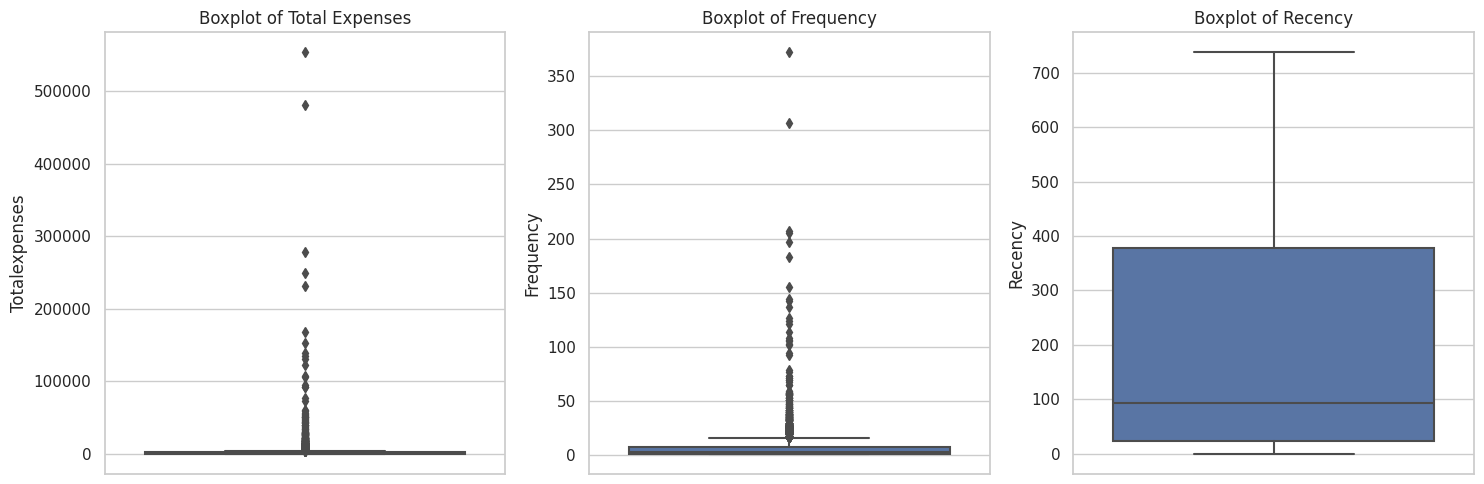

In [43]:
# Set style
sns.set(style="whitegrid")

# Create a figure with 3 boxplots
plt.figure(figsize=(15, 5))

# Totalexpenses boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=aggregated_df['Totalexpenses'])
plt.title('Boxplot of Total Expenses')

# Frequency boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=aggregated_df['Frequency'])
plt.title('Boxplot of Frequency')

# Recency boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=aggregated_df['Recency'])
plt.title('Boxplot of Recency')

# Show plots
plt.tight_layout()
plt.show()


In [44]:
# Calculate Q1 and Q3
TE_Q1 = aggregated_df['Totalexpenses'].quantile(0.25)
TE_Q3 = aggregated_df['Totalexpenses'].quantile(0.75)

# IQR
TE_IQR = TE_Q3 - TE_Q1

# Find outliers (below Q1 - 1.5*IQR OR above Q3 + 1.5*IQR)
Totalexpenses_outlier = aggregated_df[
    (aggregated_df['Totalexpenses'] <= TE_Q1 - 1.5 * TE_IQR) |
    (aggregated_df['Totalexpenses'] >= TE_Q3 + 1.5 * TE_IQR)
]

Totalexpenses_outlier.describe()


,Customer ID,Totalexpenses,Frequency,LastInvoiceDate,Recency
count,595.000000,595.000000,595.000000,595,595.000000
mean,15082.036975,16533.519731,26.053782,2011-10-22 10:53:46.789915904,47.593277
min,12346.000000,4684.670000,1.000000,2010-01-22 11:28:00,0.000000
25%,13543.000000,6010.575000,12.000000,2011-10-25 13:22:30,4.000000
50%,14918.000000,8324.080000,19.000000,2011-11-23 13:54:00,15.000000
75%,16655.500000,13052.130000,29.000000,2011-12-05 12:08:00,44.000000
max,18260.000000,553408.560000,372.000000,2011-12-09 12:49:00,686.000000
std,1762.055590,38351.386780,30.899486,NaN,96.096486


In [45]:
# Calculate Q1 and Q3 for Frequency
FQ_Q1 = aggregated_df['Frequency'].quantile(0.25)
FQ_Q3 = aggregated_df['Frequency'].quantile(0.75)

# Calculate IQR
FQ_IQR = FQ_Q3 - FQ_Q1

# Identify outliers: below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
Frequency_outlier = aggregated_df[
    (aggregated_df['Frequency'] <= FQ_Q1 - 1.5 * FQ_IQR) |
    (aggregated_df['Frequency'] >= FQ_Q3 + 1.5 * FQ_IQR)
]

Frequency_outlier.describe()


,Customer ID,Totalexpenses,Frequency,LastInvoiceDate,Recency
count,454.000000,454.000000,454.000000,454,454.000000
mean,15380.658590,17792.520088,33.094714,2011-11-07 11:16:59.207048448,31.570485
min,12415.000000,1564.310000,16.000000,2010-05-12 16:51:00,0.000000
25%,13924.000000,5375.617500,19.000000,2011-11-13 11:59:15,3.000000
50%,15299.500000,8352.925000,24.000000,2011-11-29 15:55:00,9.000000
75%,16926.750000,14351.352500,33.750000,2011-12-06 12:22:15,25.750000
max,18283.000000,553408.560000,372.000000,2011-12-09 12:49:00,575.000000
std,1753.732343,43053.260590,32.973564,NaN,70.321922


In [46]:
non_outlier_df = aggregated_df[(~aggregated_df.index.isin(Totalexpenses_outlier.index)) & (~aggregated_df.index.isin(Frequency_outlier.index))]

In [47]:
non_outlier_df.shape

(5135, 5)

In [48]:
non_outlier_df.head(10)

,Customer ID,Totalexpenses,Frequency,LastInvoiceDate,Recency
1,12347.0,4620.32,8,2011-12-07 15:52:00,1
2,12348.0,1658.40,5,2011-09-25 13:13:00,74
3,12349.0,3319.06,3,2011-11-21 09:51:00,18
4,12350.0,258.00,1,2011-02-02 16:01:00,309
5,12351.0,300.93,1,2010-11-29 15:23:00,374
6,12352.0,1705.64,9,2011-11-03 14:37:00,35
7,12353.0,406.76,2,2011-05-19 17:47:00,203
8,12354.0,1062.80,1,2011-04-21 13:11:00,231
9,12355.0,692.51,2,2011-05-09 13:49:00,213
10,12356.0,4499.21,6,2011-11-17 08:40:00,22


In [49]:
non_outlier_df.describe()

,Customer ID,Totalexpenses,Frequency,LastInvoiceDate,Recency
count,5135.000000,5135.000000,5135.000000,5135,5135.000000
mean,15335.807790,1016.171739,3.647517,2011-05-04 01:52:45.113924096,218.931451
min,12347.000000,2.950000,1.000000,2009-12-01 12:55:00,0.000000
25%,13857.500000,275.655000,1.000000,2010-11-11 14:06:00,32.000000
50%,15351.000000,645.100000,3.000000,2011-07-28 11:29:00,134.000000
75%,16807.500000,1409.070000,5.000000,2011-11-06 13:09:30,392.000000
max,18287.000000,4682.900000,15.000000,2011-12-09 12:50:00,737.000000
std,1705.837152,1020.437143,3.118676,NaN,210.910607


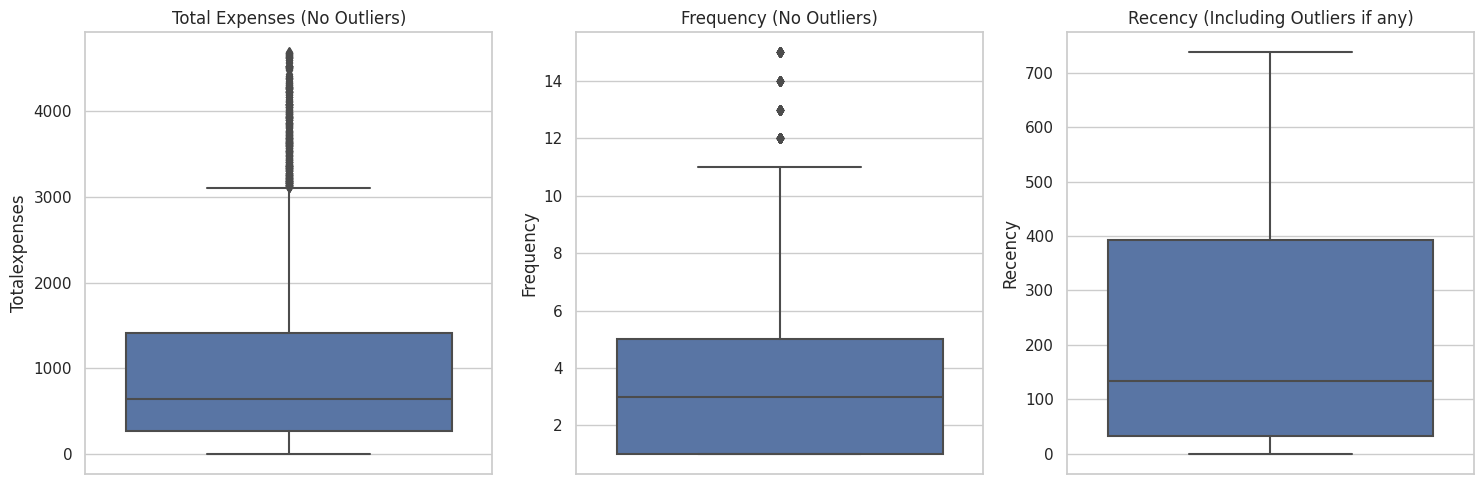

In [50]:
# Set style
sns.set(style="whitegrid")

# Create a figure with 3 boxplots
plt.figure(figsize=(15, 5))

# Totalexpenses boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=non_outlier_df['Totalexpenses'])
plt.title('Total Expenses (No Outliers)')

# Frequency boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=non_outlier_df['Frequency'])
plt.title('Frequency (No Outliers)')

# Recency boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=non_outlier_df['Recency'])
plt.title('Recency (Including Outliers if any)')

# Show the plots
plt.tight_layout()
plt.show()


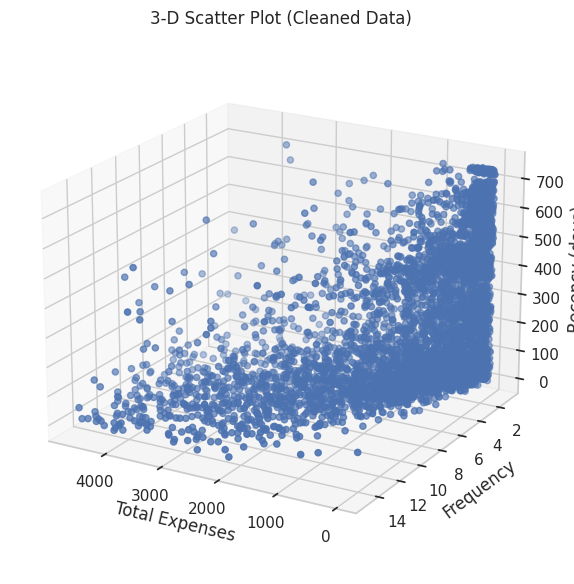

In [51]:
# 3‑D scatter plot of Totalexpenses, Frequency, Recency (non_outlier_df must already exist)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # registers the 3‑D projection

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter
ax.scatter(
    non_outlier_df['Totalexpenses'],
    non_outlier_df['Frequency'],
    non_outlier_df['Recency'],
    s=20          # marker size; adjust if needed
)

# Axis labels
ax.set_xlabel('Total Expenses')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency (days)')

# Optional: tweak the view angle
ax.view_init(elev=20, azim=120)

plt.title('3‑D Scatter Plot (Cleaned Data)')
plt.tight_layout()
plt.show()


In [52]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outlier_df[['Totalexpenses', 'Frequency', 'Recency']])

In [53]:
scaled_data_df = pd.DataFrame(scaled_data , index = non_outlier_df.index , columns=('Totalexpenses', 'Frequency', 'Recency'))

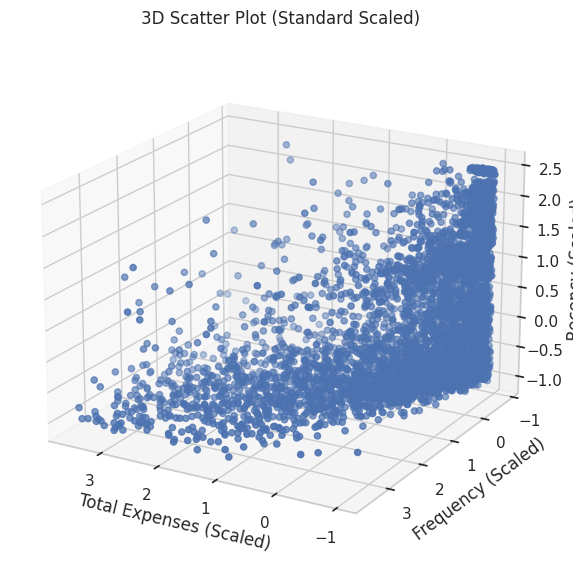

In [54]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    scaled_data_df['Totalexpenses'],
    scaled_data_df['Frequency'],
    scaled_data_df['Recency'],
    s=20
)

ax.set_xlabel('Total Expenses (Scaled)')
ax.set_ylabel('Frequency (Scaled)')
ax.set_zlabel('Recency (Scaled)')
ax.view_init(elev=20, azim=120)

plt.title('3D Scatter Plot (Standard Scaled)')
plt.tight_layout()
plt.show()


In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

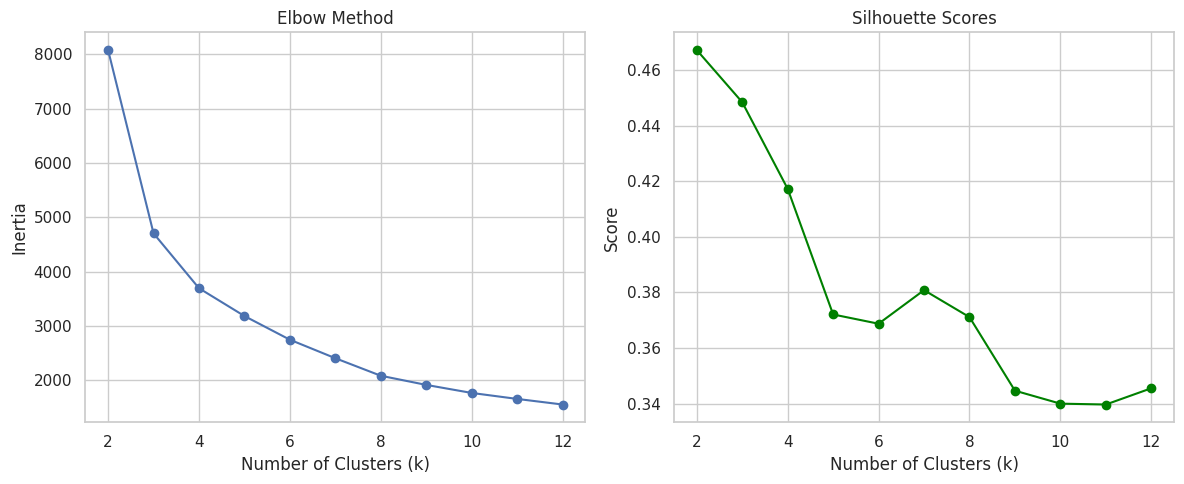

In [56]:
inertia = []
silhouette_scores = []
K_range = range(2, 13)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',     # smart centroid init
        max_iter=1000,         # you can change this value if needed
        random_state=42
    )
    kmeans.fit(scaled_data)
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot Elbow and Silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'o-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'o-', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


In [57]:
best_k = 4  # example
kmeans_final = KMeans(
    n_clusters=best_k,
    init='k-means++',
    max_iter=1000,
    random_state=42
)

scaled_data_df['Cluster'] = kmeans_final.fit_predict(scaled_data)
non_outlier_df['Cluster'] = kmeans_final.fit_predict(scaled_data)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_36/3083427307.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outlier_df['Cluster'] = kmeans_final.fit_predict(scaled_data)


In [58]:
scaled_data_df.head(10)

,Totalexpenses,Frequency,Recency,Cluster
1,3.532309,1.395755,-1.033389,1
2,0.629427,0.433714,-0.687237,2
3,2.256986,-0.207646,-0.952778,2
4,-0.743060,-0.849006,0.427088,3
5,-0.700985,-0.849006,0.735305,3
6,0.675726,1.716435,-0.872167,2
7,-0.597265,-0.528326,-0.075544,0
8,0.045699,-0.849006,0.057227,0
9,-0.317210,-0.528326,-0.028126,0
10,3.413613,0.754394,-0.933811,1


In [59]:
non_outlier_df.head(10)

,Customer ID,Totalexpenses,Frequency,LastInvoiceDate,Recency,Cluster
1,12347.0,4620.32,8,2011-12-07 15:52:00,1,1
2,12348.0,1658.40,5,2011-09-25 13:13:00,74,2
3,12349.0,3319.06,3,2011-11-21 09:51:00,18,2
4,12350.0,258.00,1,2011-02-02 16:01:00,309,3
5,12351.0,300.93,1,2010-11-29 15:23:00,374,3
6,12352.0,1705.64,9,2011-11-03 14:37:00,35,2
7,12353.0,406.76,2,2011-05-19 17:47:00,203,0
8,12354.0,1062.80,1,2011-04-21 13:11:00,231,0
9,12355.0,692.51,2,2011-05-09 13:49:00,213,0
10,12356.0,4499.21,6,2011-11-17 08:40:00,22,1


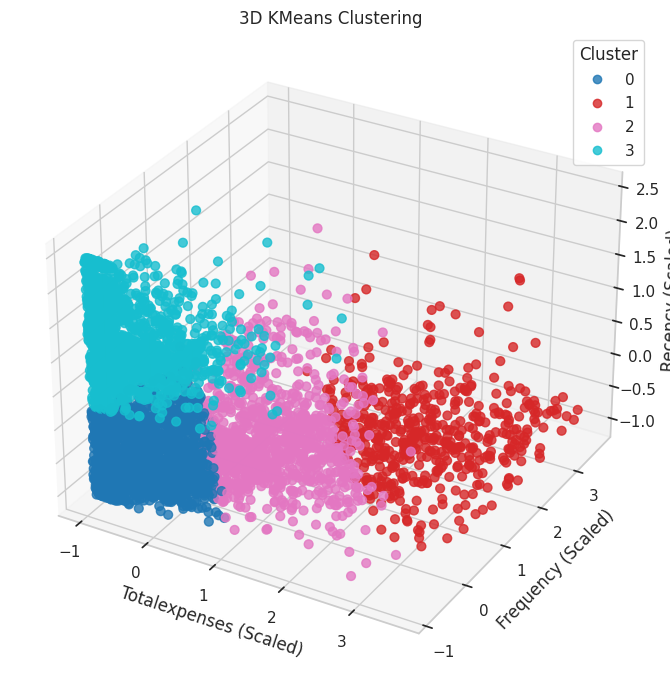

In [60]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color by cluster
scatter = ax.scatter(
    scaled_data_df['Totalexpenses'],
    scaled_data_df['Frequency'],
    scaled_data_df['Recency'],
    c=scaled_data_df['Cluster'],         # cluster-based coloring
    cmap='tab10',                   # color palette
    s=40,                           # marker size
    alpha=0.8
)

# Axis labels
ax.set_xlabel('Totalexpenses (Scaled)')
ax.set_ylabel('Frequency (Scaled)')
ax.set_zlabel('Recency (Scaled)')
ax.set_title('3D KMeans Clustering')

# Optional: Add legend (one label per cluster)
legend_labels = list(set(scaled_data_df['Cluster']))
ax.legend(*scatter.legend_elements(), title="Cluster", loc="upper right")

plt.tight_layout()
plt.show()


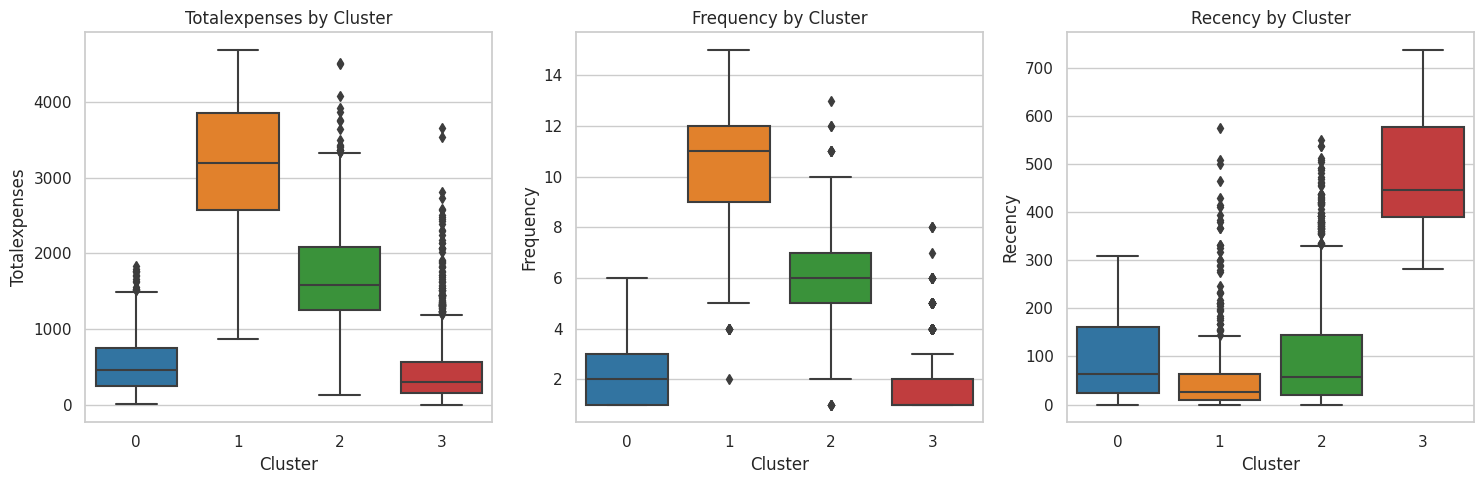

In [63]:
features = ['Totalexpenses', 'Frequency', 'Recency']

plt.figure(figsize=(15, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Cluster', y=feature, data=non_outlier_df, palette='tab10')
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In [67]:
cluster_summary = non_outlier_df.groupby('Cluster')[['Totalexpenses', 'Frequency', 'Recency']].mean().round(2)

cluster_summary

,Totalexpenses,Frequency,Recency
Cluster,,,
0,530.82,2.23,95.65
1,3204.56,10.33,56.15
2,1702.72,5.83,102.41
3,435.11,1.74,482.86


In [69]:
# Mapping cluster number to custom labels
cluster_labels = {
    0: 'Occasional Shopper',
    1: 'Loyal High-Value',
    2: 'Mid-Tier Customer',
    3: 'Lost or Dormant'
}

# Apply labels
non_outlier_df['Cluster_Label'] = non_outlier_df['Cluster'].map(cluster_labels)


/tmp/ipykernel_36/4046099654.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outlier_df['Cluster_Label'] = non_outlier_df['Cluster'].map(cluster_labels)


| Cluster | Totalexpenses | Frequency | Recency | Label              |
|---------|----------------|-----------|---------|---------------------|
| 0       | Low            | Low       | Medium  | Occasional Shopper |
| 1       | High           | High      | Low     | Loyal High-Value   |
| 2       | Medium         | Medium    | Medium  | Mid-Tier Customer  |
| 3       | Low            | Low       | High    | Lost or Dormant    |


In [70]:
non_outlier_df.head(7)

,Customer ID,Totalexpenses,Frequency,LastInvoiceDate,Recency,Cluster,Cluster_Label
1,12347.0,4620.32,8,2011-12-07 15:52:00,1,1,Loyal High-Value
2,12348.0,1658.40,5,2011-09-25 13:13:00,74,2,Mid-Tier Customer
3,12349.0,3319.06,3,2011-11-21 09:51:00,18,2,Mid-Tier Customer
4,12350.0,258.00,1,2011-02-02 16:01:00,309,3,Lost or Dormant
5,12351.0,300.93,1,2010-11-29 15:23:00,374,3,Lost or Dormant
6,12352.0,1705.64,9,2011-11-03 14:37:00,35,2,Mid-Tier Customer
7,12353.0,406.76,2,2011-05-19 17:47:00,203,0,Occasional Shopper


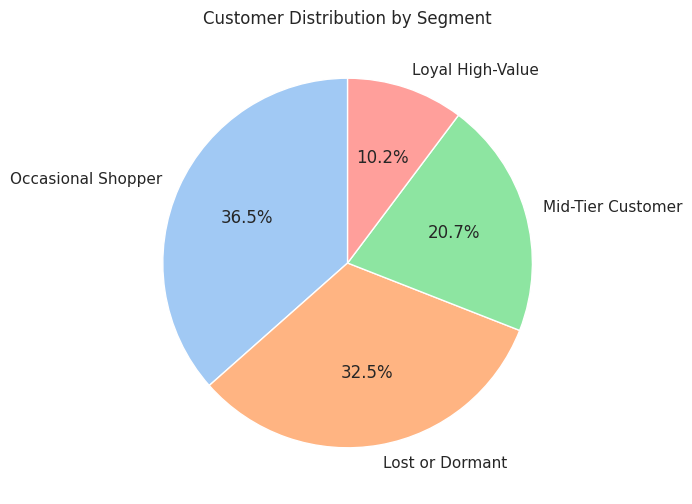

In [71]:
plt.figure(figsize=(6, 6))
non_outlier_df['Cluster_Label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.ylabel('')
plt.title('Customer Distribution by Segment')
plt.show()


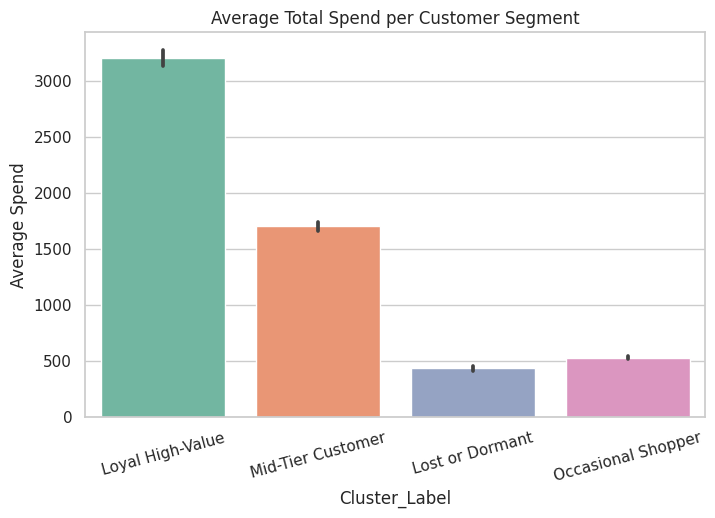

In [72]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster_Label', y='Totalexpenses', data=non_outlier_df, estimator='mean', palette='Set2')
plt.xticks(rotation=15)
plt.title('Average Total Spend per Customer Segment')
plt.ylabel('Average Spend')
plt.show()


In [73]:
non_outlier_df.to_csv('final_customer_segments_original_values.csv', index=False)